<a href="https://colab.research.google.com/github/yeesem/Data-Structure/blob/main/Soft_Computing_Assignment_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !pip3 install -U ucimlrepo
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=46a45a3488ecf192fbdea096bf14e3cec7ffe7745bfeb8c39821df38a7831531
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
communities_and_crime = fetch_ucirepo(id=183)

# data (as pandas dataframes)
X = communities_and_crime.data.features
y = communities_and_crime.data.targets

# **Data Exploration**

In [4]:
print("Number of columns : ", X.shape[1])
print("Number of rows    : ", X.shape[0])

Number of columns :  127
Number of rows    :  1994


In [5]:
X.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?


In [6]:
for index,col in enumerate(X.columns):
  print("Column : ",index)
  print(col , " : ", X[col].info())
  print("Missing value : ",np.sum(X[col] == '?'))
  print(X[col].unique())
  print("\n\n")

Column :  0
<class 'pandas.core.series.Series'>
RangeIndex: 1994 entries, 0 to 1993
Series name: state
Non-Null Count  Dtype
--------------  -----
1994 non-null   int64
dtypes: int64(1)
memory usage: 15.7 KB
state  :  None
Missing value :  0
[ 8 53 24 34 42  6 44 21 29 36 25 55 19 18 12 41 39 54  9  1 51 40 35 33
 48  4 37 49 46 28 22 45 16 47  5 50 13 23 38 27 20 56  2 11 32 10]



Column :  1
<class 'pandas.core.series.Series'>
RangeIndex: 1994 entries, 0 to 1993
Series name: county
Non-Null Count  Dtype 
--------------  ----- 
1994 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB
county  :  None
Missing value :  1174
['?' '5' '95' '7' '21' '87' '187' '1' '27' '129' '31' '193' '29' '680'
 '23' '3' '19' '35' '790' '53' '9' '119' '99' '17' '11' '135' '133' '45'
 '39' '61' '43' '157' '15' '13' '37' '107' '89' '41' '93' '71' '590' '55'
 '101' '75' '57' '63' '760' '69' '25' '830' '77' '155' '151' '123' '113'
 '49' '139' '169' '630' '79' '510' '65' '81' '105' '141' '33' '59' '131

In [7]:
index_of_col_with_missing_value = []

for index,col in enumerate(X.columns):
  if X[col].astype(str).str.contains("\?").any():
    print("Column name  : ",col)
    print("Column type  : ",type(X[col]))
    print("Column index : ",index)
    print("Number of missing value : ", np.sum(X[col] == "?"))
    index_of_col_with_missing_value.append(index)
    print("\n")

print("Total number of col with missing value : ", len(index_of_col_with_missing_value))
print(index_of_col_with_missing_value)

Column name  :  county
Column type  :  <class 'pandas.core.series.Series'>
Column index :  1
Number of missing value :  1174


Column name  :  community
Column type  :  <class 'pandas.core.series.Series'>
Column index :  2
Number of missing value :  1177


Column name  :  OtherPerCap
Column type  :  <class 'pandas.core.series.Series'>
Column index :  30
Number of missing value :  1


Column name  :  LemasSwornFT
Column type  :  <class 'pandas.core.series.Series'>
Column index :  101
Number of missing value :  1675


Column name  :  LemasSwFTPerPop
Column type  :  <class 'pandas.core.series.Series'>
Column index :  102
Number of missing value :  1675


Column name  :  LemasSwFTFieldOps
Column type  :  <class 'pandas.core.series.Series'>
Column index :  103
Number of missing value :  1675


Column name  :  LemasSwFTFieldPerPop
Column type  :  <class 'pandas.core.series.Series'>
Column index :  104
Number of missing value :  1675


Column name  :  LemasTotalReq
Column type  :  <class 'pan

In [8]:
#Convert data into dataframe
feature = pd.DataFrame(X,columns = communities_and_crime.data.features_name)
target = pd.DataFrame(y,columns = communities_and_crime.data.targets_name)

# **Data Cleaning and Preprocessing**

In [9]:
#Drop col with missing value
col_to_drop = []
col_to_remain = []

for index in index_of_col_with_missing_value:
  col = feature.columns[index]
  if np.sum(feature[col]=="?") > 1000:
    col_to_drop.append(col)
  else:
    col_to_remain.append(col)

print("Column's names to drop   : ", col_to_drop)
print("Column's names to remain : ", col_to_remain)

#Drop the columns
feature.drop(columns = col_to_drop ,axis = 1,inplace = True)

#Replace the "?" value with median value
feature[col_to_remain] = feature[col_to_remain].replace("?",np.nan).astype(float)
feature.loc[:, col_to_remain] = feature[col_to_remain].fillna(feature[col_to_remain].median())

check_null = feature.isnull().sum() > 0
columns_with_null = check_null[check_null].index.tolist()
print("Columns with missing value : ",columns_with_null)

Column's names to drop   :  ['county', 'community', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']
Column's names to remain :  ['OtherPerCap']
Columns with missing value :  []


In [10]:
feature = feature.apply(pd.to_numeric,errors='ignore')


#Check Column with 'Object' Data Type
col_with_obj_datatype = []
for index,col in enumerate(feature.columns):
  if str(feature[col].dtype) != 'float64' and  str(feature[col].dtype) != 'int':
    print("Column name  : ",col)
    print("Column index : ",index)
    col_with_obj_datatype.append(col)
    print("\n")

feature.drop(columns = col_with_obj_datatype,inplace = True)

Column name  :  state
Column index :  0


Column name  :  communityname
Column index :  1


Column name  :  fold
Column index :  2




In [11]:
#Split the data into train,test and validaton set
from sklearn.model_selection import train_test_split

test_size = 0.3

X_train,X_temp,y_train,y_temp = train_test_split(feature,target,test_size = test_size,random_state = 42)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size = 0.5,random_state = 42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)
print("Validation data shape:", X_val.shape, y_val.shape)

Training data shape: (1395, 100) (1395, 1)
Testing data shape: (299, 100) (299, 1)
Validation data shape: (300, 100) (300, 1)


# **Feature Selection - GA Algorithm**

In [12]:
import random
import statistics
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [13]:
def filter_low_correlation_features_with_target(df,threshold,target):
  col_low_corr = []
  corr_matrix = df.corrwith(df[target])
  for i in df.columns:
    if abs(corr_matrix[i]) < threshold:
      col_low_corr.append(i)

  df.drop(columns = col_low_corr,axis = 1,inplace = True)
  print("Features with low correlation with target that has been dropped : ",col_low_corr)


In [14]:
def filter_high_correlation_features_with_target(df,target,threshold):
  col_corr = set()
  corr_matrix = df.corr()
  for i in range(len(df.columns)):
    for j in range (i):
      if corr_matrix.iloc[i,j] > threshold:
        col_name1 = corr_matrix.columns[j]
        col_name2 = corr_matrix.columns[i]
        corr_name1_target = abs(corr_matrix.loc[col_name1,target].iloc[0])
        corr_name2_target = abs(corr_matrix.loc[col_name2,target].iloc[0])
        if corr_name1_target > corr_name2_target:
           col_corr.add(col_name2)
        else:
           col_corr.add(col_name1)

  df.drop(columns = col_corr,axis = 1,inplace = True)
  print("Feature with high correlation with target that has been dropped : ",col_corr)
  return col_corr

In [15]:
# import random ############
def genetic_algo(data,features,target,population_size,tol_level,top_number):
  # ############ add seed value
  # random.seed(seed)
  # print("running gen algo ..........")
  def init_population(population_size,c,top_number):
    # print("initializing population ...........") ##########
    population = []
    for i in range(population_size):
      individual = [0]*c
      j = 0
      while(j<top_number):
        p = random.uniform(0,1)
        position = random.randrange(c)
        if(p>=0.5 and individual[position]==0):
          individual[position]=1
          j=j+1

      #edge case if all genes are 0 then we will make any one gene as 1
      if(sum(individual)==0):
        position = random.randrange(c)
        individual[position] = 1

      population.append(individual)
    # print('population is ')
    # print(population)
    # print('------------------')
    # print("population initialized ............") ##############
    return population




  def calculate_fitness(features,target):
    # print("calculating fitness ..............") #############
    model = xgb.XGBRegressor()
    scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
    return scores.mean()



  def get_fitness(population,data):
    # print("Getting fitness for pop .......") ############
    fitness_values = []
    for individual in population:
      df = data
      i=0
      for column in data:
        if(individual[i]==0):
          df = df.drop(column,axis=1)
        i=i+1

      features = df
      individual_fitness = calculate_fitness(features,target)
      fitness_values.append(individual_fitness)
    # print("fitness values obtained ............") ################
    return fitness_values



  def select_parents(population,fitness_values):
    # print("selecting parents ...........") #############
    parents = []
    total = sum(fitness_values)
    norm_fitness_values = [x/total for x in fitness_values]

    #find cumulative fitness values for roulette wheel selection
    cumulative_fitness = []
    start = 0
    for norm_value in norm_fitness_values:
      start+=norm_value
      cumulative_fitness.append(start)

    population_size = len(population)
    for count in range(population_size):
      random_number = random.uniform(0, 1)
      individual_number = 0
      for score in cumulative_fitness:
        if(random_number<=score):
          parents.append(population[individual_number])
          break
        individual_number+=1
    # print("Parent selected .......") ####################
    return parents



  #high probability crossover
  def two_point_crossover(parents,probability):
    # print("performing crossover ......") #######################
    random.shuffle(parents)
    #count number of pairs for crossover
    no_of_pairs = round(len(parents)*probability/2)
    chromosome_len = len(parents[0])
    crossover_population = []

    for num in range(no_of_pairs):
      length = len(parents)
      parent1_index = random.randrange(length)
      parent2_index = random.randrange(length)
      while(parent1_index == parent2_index):
        parent2_index = random.randrange(length)

      start = random.randrange(chromosome_len)
      end = random.randrange(chromosome_len)
      if(start>end):
        start,end = end, start

      parent1 = parents[parent1_index]
      parent2 = parents[parent2_index]
      child1 =  parent1[0:start]
      child1.extend(parent2[start:end])
      child1.extend(parent1[end:])
      child2 =  parent2[0:start]
      child2.extend(parent1[start:end])
      child2.extend(parent2[end:])
      parents.remove(parent1)
      parents.remove(parent2)
      crossover_population.append(child1)
      crossover_population.append(child2)

    #to append remaining parents which are not undergoing crossover process
    if(len(parents)>0):
      for remaining_parents in parents:
        crossover_population.append(remaining_parents)
    # print("crossover performed .............") #####################
    return crossover_population



  #low probability mutation
  #mutation_probability is generally low to avoid a lot of randomness
  def mutation(crossover_population):
    # print("performing mutation ............") ####################
    #swapping of zero with one to retain no of features required
    for individual in crossover_population:
      index_1 = random.randrange(len(individual))
      index_2 = random.randrange(len(individual))
      while(index_2==index_1 and individual[index_1] != individual[index_2]):
        index_2 = random.randrange(len(individual))

      #swapping the bits
      temp = individual[index_1]
      individual[index_1] = individual[index_2]
      individual[index_2] = temp
    # print("Mutation performed ...........") ###########3
    return crossover_population


  c = data.shape[1] #length of the chromosome
  population= init_population(population_size,c,top_number)
  fitness_values = get_fitness(population,data)
  parents = select_parents(population,fitness_values)
  crossover_population = two_point_crossover(parents,0.78)
  population = crossover_population
  p = random.uniform(0,1)
  if(p<=0.001):
    mutated_population = mutation(crossover_population)
    population = mutated_population
  fitness_values = get_fitness(population,data)
  variance_of_population = statistics.variance(fitness_values)
  print("Variance is : ",variance_of_population)
  gen = 1


  #repeating algorithm til stopping criterion is met
  while(variance_of_population > tol_level):
    print('Generation-',gen)
    parents = select_parents(population,fitness_values)
    crossover_population = two_point_crossover(parents,0.78)
    population = crossover_population
    p = random.uniform(0,1)
    if(p<=0.001): #mutation prob here
      mutated_population = mutation(crossover_population)
      population = mutated_population
    fitness_values = get_fitness(population,data)
    variance_of_population = statistics.variance(fitness_values)
    print("Variance is",variance_of_population)
    gen+=1

  best_features = []
  best_f1_score = 0
  optimal_fitness = sum(fitness_values)/len(fitness_values)
  print('Average fitness is: ',optimal_fitness)
  for index,fitness_value in enumerate(fitness_values):
    error = abs((fitness_value - optimal_fitness)/optimal_fitness)
    if(error <= 0.01):
      best_features = population[index]
      best_f1_score = fitness_value

  return best_features,best_f1_score

In [16]:
#running the algorithm
df = pd.concat([X_train,y_train],axis = 1)
filter_low_correlation_features_with_target(df,0.3,y_train.columns)
filter_high_correlation_features_with_target(df,y_train.columns,0.85)
top_features, best_score = genetic_algo(df,df[df.columns[:-1]], df[df.columns[-1:]],100,0.05,5)

#printing top features selected through genetic algorithm
i = 0
list_of_features= []
for i in range(len(top_features)):
  if(top_features[i]==1):
    list_of_features.append(X_train.columns[i])

print("Top features:", top_features)
print("List of features:", list_of_features)
print("Best score:", best_score)

Features with low correlation with target that has been dropped :  []
Feature with high correlation with target that has been dropped :  {'PctLargHouseOccup', 'agePct65up', 'PctRecImmig5', 'PctImmigRec8', 'PctLess9thGrade', 'RentMedian', 'MalePctDivorce', 'PctYoungKids2Par', 'PctTeen2Par', 'numbUrban', 'PctForeignBorn', 'racePctHisp', 'PctRecentImmig', 'pctWWage', 'PctHousOwnOcc', 'OwnOccHiQuart', 'OwnOccMedVal', 'PctFam2Par', 'householdsize', 'PctImmigRec5', 'PersPerFam', 'PctNotSpeakEnglWell', 'TotalPctDiv', 'RentHighQ', 'MedRent', 'perCapInc', 'medIncome', 'NumUnderPov', 'PctLargHouseFam', 'PctImmigRecent', 'population', 'agePct12t21', 'agePct16t24', 'OwnOccLowQuart', 'whitePerCap', 'PctWorkMomYoungKids', 'PctRecImmig8', 'HousVacant', 'PersPerOccupHous', 'PctBSorMore'}
Variance is :  0.00010929486693118901
Average fitness is:  -0.04114181484299077
Top features: [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# **Define rules**

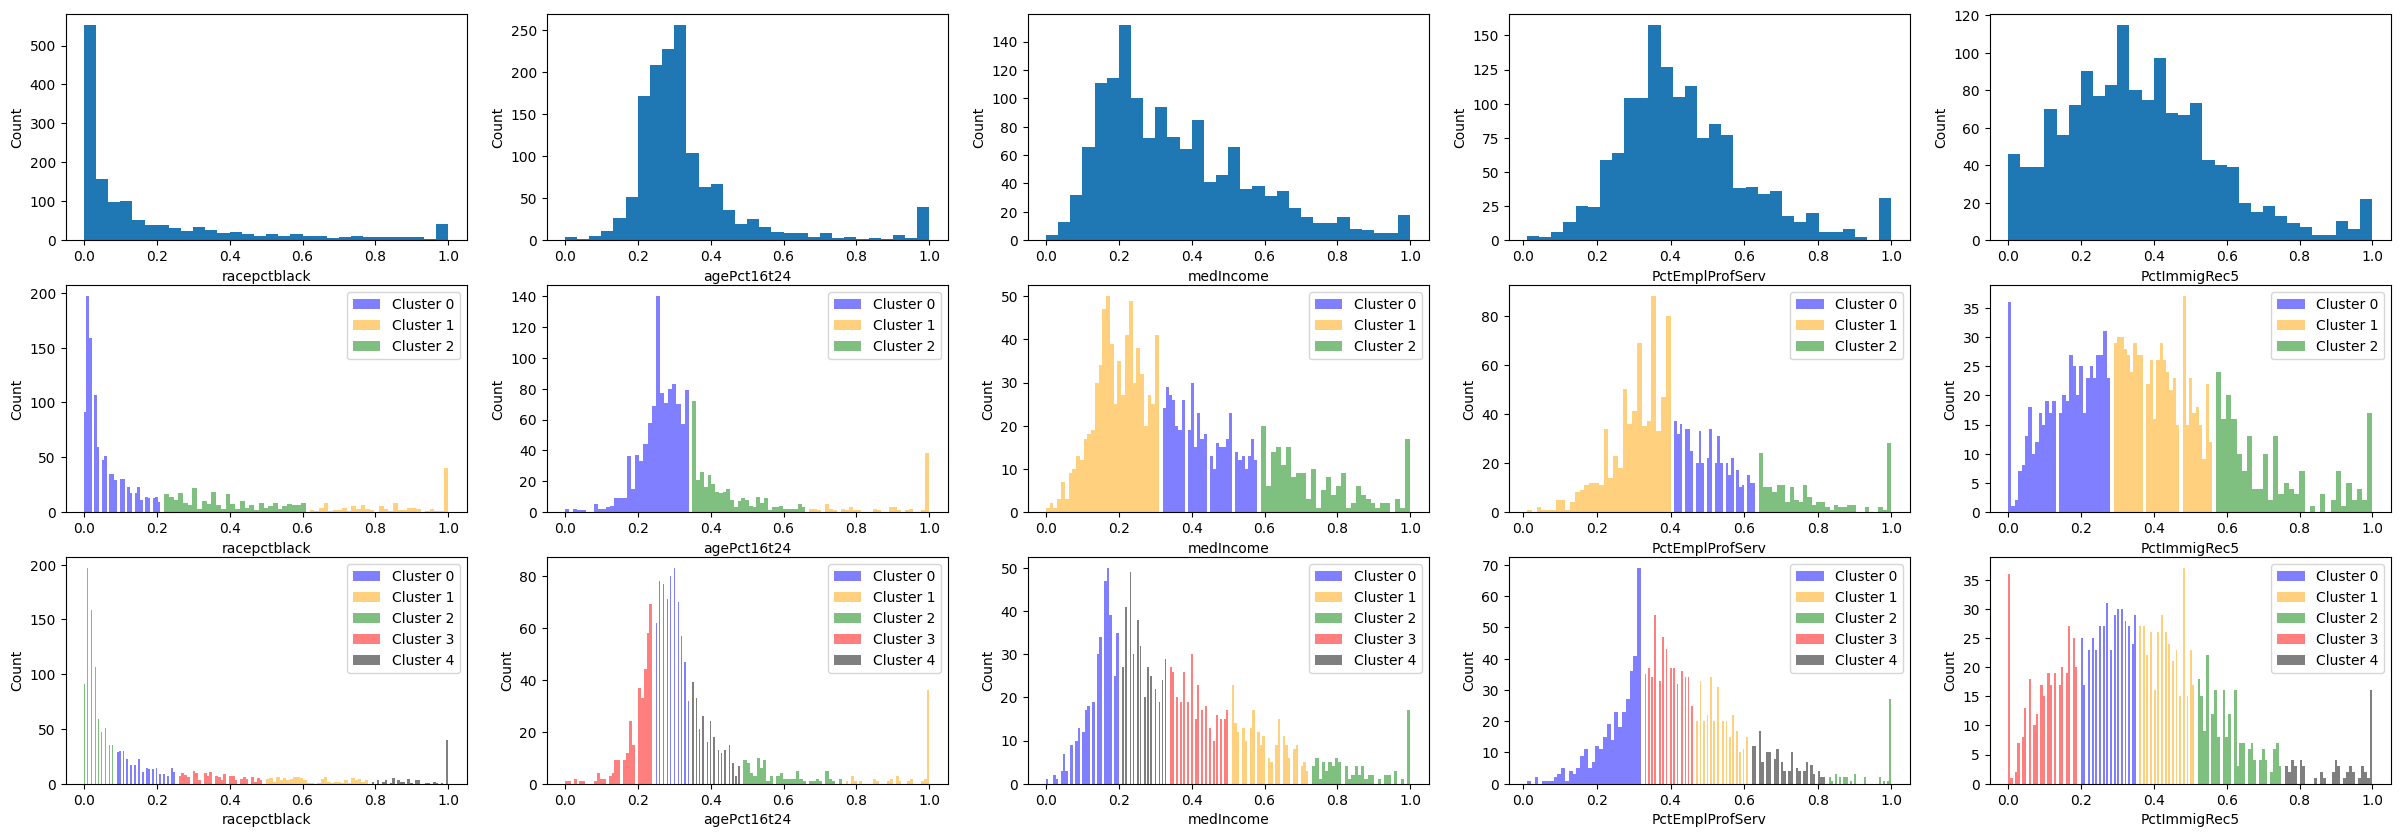

In [17]:
num_clusters = 5

#Hide the messages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def KMeans_clustering(table,feature,num_clusters):
  tempt = table.copy()
  # g = sns.FacetGrid(table)
  # g = g.map(plt.hist,feature,bins=30,alpha = 1)
  kmeans = KMeans(n_clusters = num_clusters).fit(pd.DataFrame(tempt[feature]));
  tempt['label'] = kmeans.labels_
  # g = sns.FacetGrid(tempt,hue = 'label')
  # g = g.map(plt.hist,feature,bins=30,alpha = 1)
  return kmeans,kmeans.labels_


fig,ax = plt.subplots(nrows = 3,ncols = len(list_of_features),figsize = (30,10))

for i in range(len(list_of_features)):
  ax[0,i].hist(X_train[list_of_features[i]],bins = 30)
  ax[0,i].set_xlabel(list_of_features[i])
  ax[0,i].set_ylabel('Count')

for i in range(len(list_of_features)):
    kmeans_labels = KMeans_clustering(X_train, list_of_features[i], 3)[1]

    unique_labels = np.unique(kmeans_labels)
    colors = ['blue', 'orange', 'green']  # Define colors for each cluster label

    # Plot histograms for each feature
    for label, color in zip(unique_labels, colors):
        data_for_label = X_train[list_of_features[i]][kmeans_labels == label]
        ax[1, i].hist(data_for_label, bins=30, alpha=0.5, label=f'Cluster {label}', color=color)

    ax[1, i].set_xlabel(list_of_features[i])
    ax[1, i].set_ylabel('Count')
    ax[1, i].legend()

for i in range(len(list_of_features)):
    kmeans_labels = KMeans_clustering(X_train, list_of_features[i], 5)[1]

    unique_labels = np.unique(kmeans_labels)
    colors = ['blue', 'orange', 'green','red','black']  # Define colors for each cluster label

    # Plot histograms for each feature
    for label, color in zip(unique_labels, colors):
        data_for_label = X_train[list_of_features[i]][kmeans_labels == label]
        ax[2, i].hist(data_for_label, bins=30, alpha=0.5, label=f'Cluster {label}', color=color)

    ax[2, i].set_xlabel(list_of_features[i])
    ax[2, i].set_ylabel('Count')
    ax[2, i].legend()

plt.show()


 racepctblack  : 


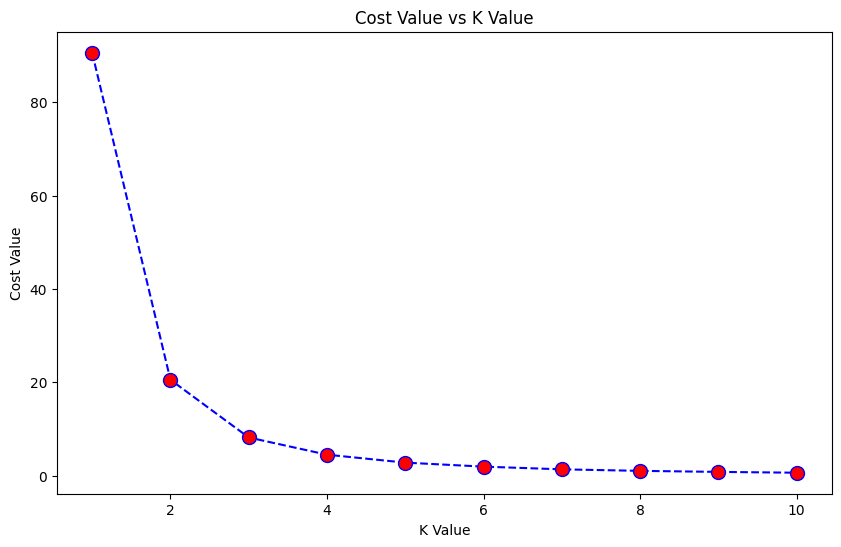


 agePct16t24  : 


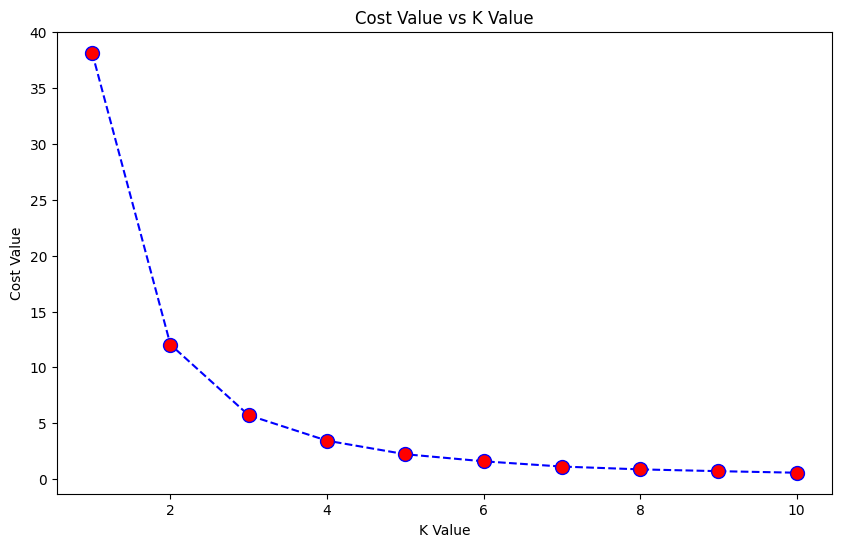


 medIncome  : 


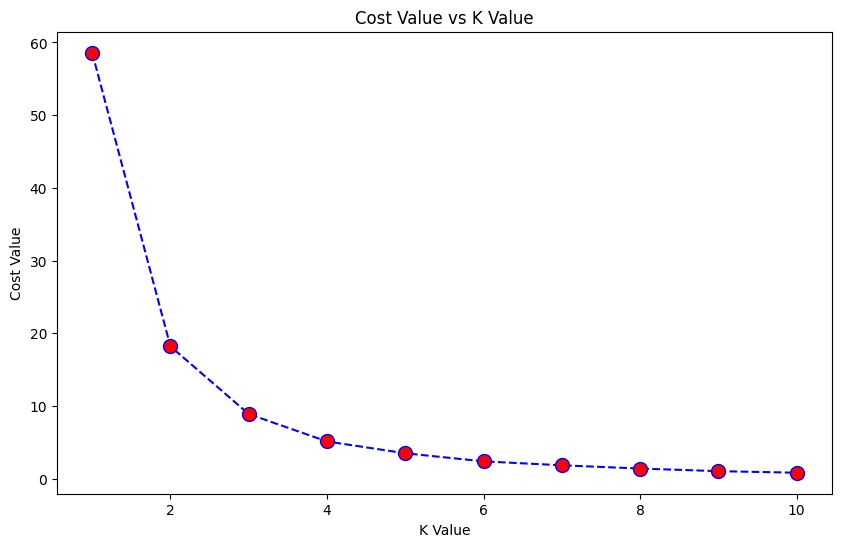


 PctEmplProfServ  : 


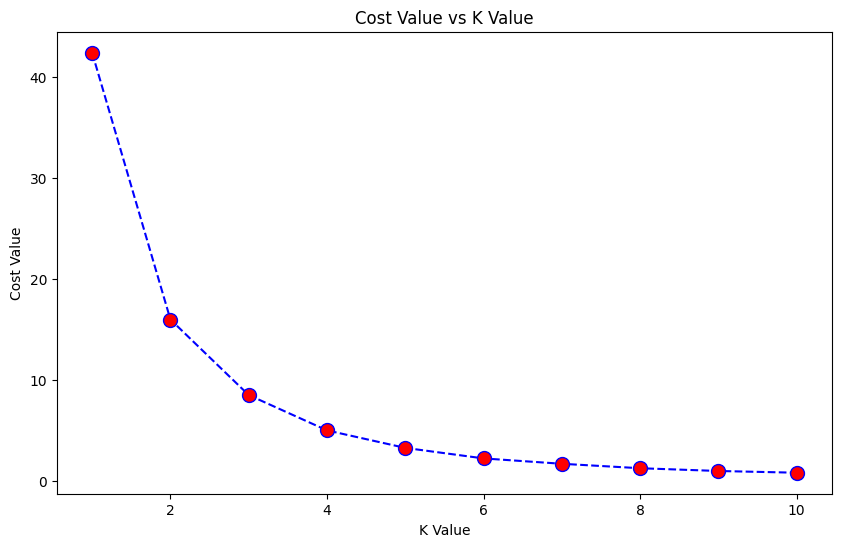


 PctImmigRec5  : 


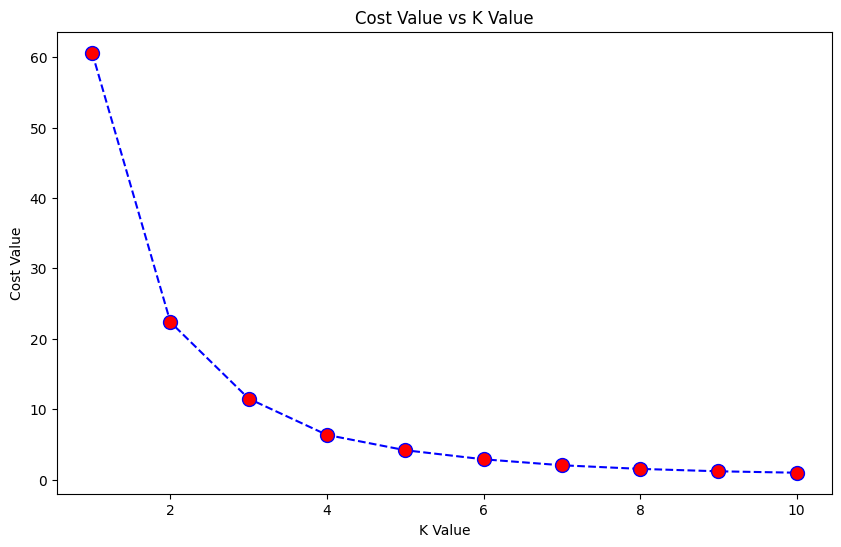

In [18]:
for feature in list_of_features:
  cost_value = []
  print("\n", feature , " : ")
  for i in range(10):
    kmeans = KMeans_clustering(X_train,feature,i+1)[0]
    cost_value.append(kmeans.inertia_)

  plt.figure(figsize=(10,6))
  plt.plot(range(1,11),cost_value,color = 'blue',linestyle='--',marker='o',
         markerfacecolor='red',markersize=10)
  plt.title('Cost Value vs K Value')
  plt.xlabel('K Value')
  plt.ylabel('Cost Value')
  plt.show()


In [19]:
class Fuzzify(object):
  def __init__(self,data_series,Min,Max,Mid):
    self.data = data_series
    self.feature = feature
    self.low = Min
    self.high = Max
    self.mid = Mid
    self.universe = np.arange(np.floor(self.low),np.ceil(self.high)+0.2,  0.1)
    self.trimf_low = fuzz.trimf(self.universe,[self.low,self.low,self.mid])
    self.trimf_mid = fuzz.trimf(self.universe,[self.low,self.mid,self.high+0.1])
    self.trimf_high = fuzz.trimf(self.universe,[self.mid,self.high+0.1,self.high+0.1])

  def get_universe(self):
    return self.universe

  #Assign fuzzy membership to each observation in the data series
  #and return a dataframe
  def get_membership(self):
    new_df= pd.DataFrame(self.data)
    new_df['low'] = fuzz.interp_membership(self.universe,self.trimf_low,self.data)
    new_df['mid'] = fuzz.interp_membership(self.universe,self.trimf_mid,self.data)
    new_df['high'] = fuzz.interp_membership(self.universe,self.trimf_high,self.data)
    new_df['membership'] = new_df.loc[:,['low','mid','high']].idxmax(axis = 1)
    new_df['degree'] = new_df.loc[:,['low','mid','high']].max(axis = 1)
    return new_df


In [20]:
def get_cluster_MinMaxMid(data,feature_list,num_clusters,fuzzfied = False):
    feature_object = []
    min_max_mids = []  ########### added by hy

    for feature in feature_list:

        num_clusters = 3
        labels = KMeans_clustering(data,feature,num_clusters)[1]
        feature_tempt = data[feature].loc[:]
        tempt_df = pd.DataFrame({
            'Feature' : feature_tempt,
            'label' : labels
        })

        feature_value = []
        for i in range(num_clusters):
          feature_value.append(tempt_df[tempt_df['label'] == i]['Feature'].min())
          feature_value.append(tempt_df[tempt_df['label'] == i]['Feature'].max())

        feature_value = np.array(feature_value)

        feature_min = feature_value.min()
        feature_max = feature_value.max()
        feature_mid = np.median(feature_value)

        # print(feature_min)
        # print(feature_max)
        # print(feature_mid)

        if fuzzfied == True:
            tempt_object = Fuzzify(feature_tempt,feature_min,feature_max,feature_mid)
            feature_object.append(tempt_object)

        min_max_mid = {
            'df' : feature_tempt,
            'min' : feature_min,
            'max' : feature_max,
            'mid' : feature_mid
        }

        min_max_mids.append(min_max_mid) ######### added by hy

    return min_max_mids,feature_object ######## added 1 more s


In [21]:
# copy_list_of_features = ['population', 'indianPerCap', 'NumUnderPov', 'PctBSorMore', 'PctOccupManu', 'MalePctDivorce', 'PctKids2Par', 'PctTeen2Par', 'PersPerOccupHous', 'PctHousOwnOcc', 'PctHousNoPhone', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'NumInShelters', 'LandArea']
copy_list_of_features = list_of_features
#copy_list_of_features = ['agePct16t24', 'pctWPubAsst', 'PersPerRentOccHous', 'PctWOFullPlumb', 'NumInShelters']


min_max_mid = get_cluster_MinMaxMid(X_train,[copy_list_of_features[0]],3)
min_max_dict = min_max_mid[0][0]  ######### added by hy
feature1_object = Fuzzify(min_max_dict['df'], min_max_dict['min'], min_max_dict['max'], min_max_dict['mid']) ########### chenged by hy
# feature1_object = Fuzzify(min_max_mid[0]['df'],min_max_mid[0]['min'],min_max_mid[0]['max'],min_max_mid[0]['mid'])
fuzzified_feature1 = feature1_object.get_membership()

fuzzified_feature1.head()

,racepctblack,low,mid,high,membership,degree
557,0.22,0.469880,0.530120,0.000000,mid,0.530120
694,0.37,0.108434,0.891566,0.000000,mid,0.891566
1718,0.76,0.000000,0.496350,0.503650,high,0.503650
1342,0.00,1.000000,0.000000,0.000000,low,1.000000
1159,0.86,0.000000,0.350365,0.649635,high,0.649635


In [22]:
#Calculate X membership function
feature_min_max_mid = get_cluster_MinMaxMid(X_train,copy_list_of_features,3,fuzzfied = True)

In [23]:
#Calculate Y membership function
target_min_max_mid = get_cluster_MinMaxMid(y_train,['ViolentCrimesPerPop'],3,fuzzfied = True)

In [24]:
X_train[copy_list_of_features]

,racepctblack,agePct16t24,medIncome,PctEmplProfServ,PctImmigRec5
557,0.22,0.30,0.27,0.39,0.48
694,0.37,0.29,0.25,0.33,0.52
1718,0.76,0.27,0.16,0.37,0.00
1342,0.00,0.27,0.23,0.43,0.86
1159,0.86,0.31,0.26,0.58,0.53
...,...,...,...,...,...
1130,0.24,0.35,0.42,0.37,0.42
1294,0.07,0.18,0.28,0.21,0.31
860,0.03,0.19,0.31,0.50,0.17
1459,0.11,0.22,0.40,0.29,0.33


In [25]:
train_data = X_train[copy_list_of_features]
train_data = train_data.join(y_train)

In [26]:
# train_data = X_train[copy_list_of_features]
# train_data = train_data + y_train

###Attention
feature_object = feature_min_max_mid[1] + target_min_max_mid[1]
def get_rule(train_data, X_train, y_train, feature_object):  ############ add X_train parameter
  rule_df = train_data.copy()
  rule_df['degree'] = np.ones(X_train.shape[0])
  for col in train_data.columns[:]:
    idx = train_data.columns.get_loc(col)
    feature_membership = feature_object[idx].get_membership()
    rule_df[col] = feature_membership['membership']
    rule_df['degree'] *= feature_membership['degree']
  final_rule = rule_df
  final_rule['ViolentCrimesPerPop Value'] = y_train.iloc[:]
  # print(list(rule_df.columns[:-3])) ##########################
  final_rule = final_rule.groupby(list(rule_df.columns[:-3])).max()
  final_rule = final_rule.reset_index()
  col_to_move = final_rule.pop('degree')
  final_rule['degree'] = col_to_move
  return final_rule

In [27]:
rules = get_rule(train_data,X_train,y_train, feature_object) ########### Add 2 more parameter
rules.sort_values(by = 'degree',ascending=False,inplace = True)
rules

,racepctblack,agePct16t24,medIncome,PctEmplProfServ,PctImmigRec5,ViolentCrimesPerPop,ViolentCrimesPerPop Value,degree
51,low,mid,mid,mid,low,mid,0.82,0.571850
46,low,mid,low,mid,mid,mid,0.68,0.488628
35,low,low,mid,mid,low,mid,0.44,0.450848
14,low,high,low,high,high,mid,0.34,0.432097
52,low,mid,mid,mid,mid,mid,0.76,0.423478
...,...,...,...,...,...,...,...,...
27,low,low,low,mid,high,low,0.18,0.071951
79,mid,mid,mid,low,low,mid,0.29,0.067973
63,mid,low,low,low,mid,high,0.80,0.066480
17,low,high,low,mid,low,low,0.11,0.058401


# **Framework**

In [28]:
#Define input and output
antecedent = {}
for feature in copy_list_of_features:
   antecedent[feature] = ctrl.Antecedent(np.arange(0,1+0.1,0.1),feature)

column_name = y_train.columns[0]

consequent = ctrl.Consequent(np.arange(0,1+0.1,0.1), column_name)

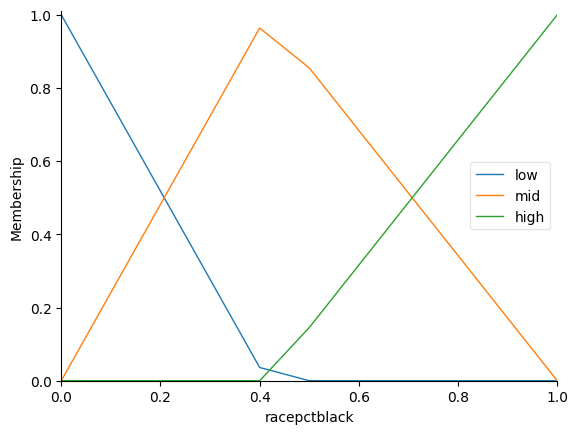

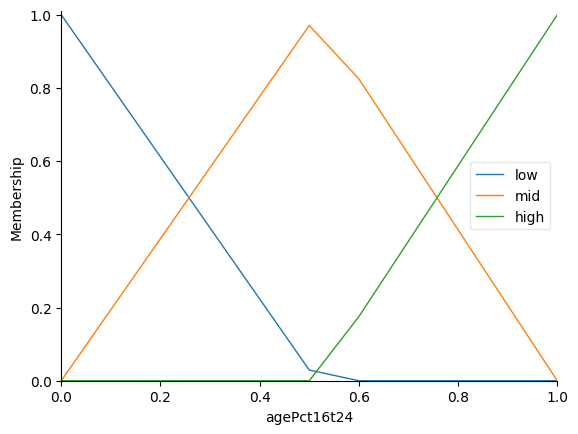

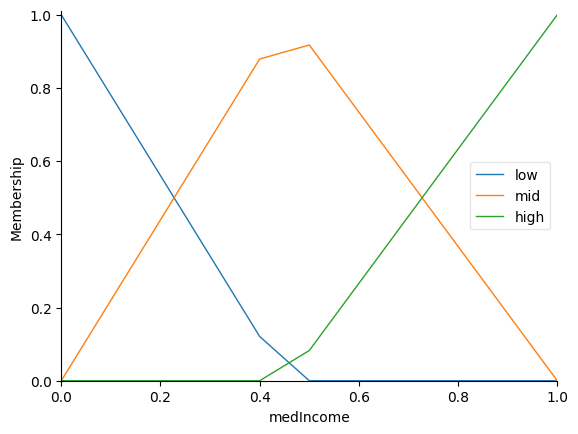

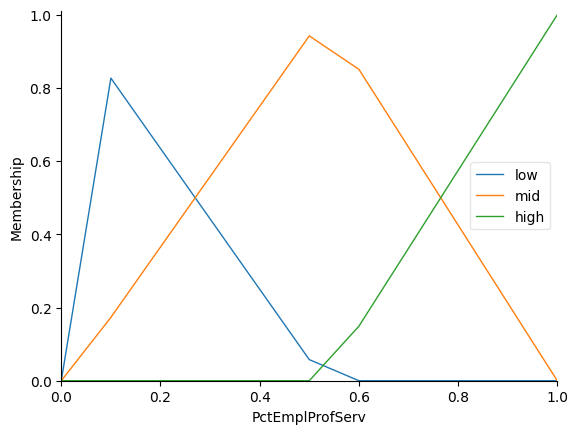

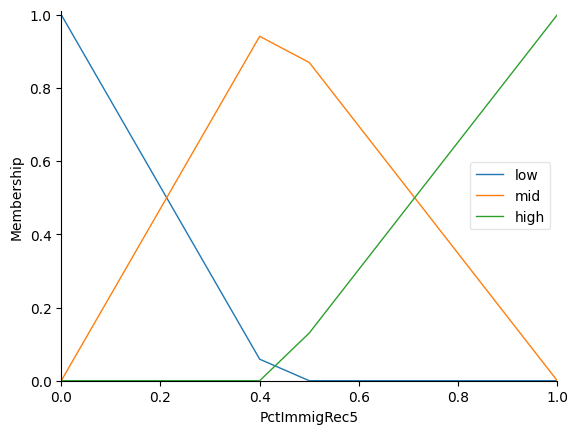

In [29]:
#Define membership function
for feature in antecedent.keys():

  min_max_mid = get_cluster_MinMaxMid(X_train,[feature],3)[0]

  low = min_max_mid[0]['min']        #################### added [0]
  high = min_max_mid[0]['max']
  mid = min_max_mid[0]['mid']

  antecedent[feature]['low'] = fuzz.trimf(antecedent[feature].universe,[low,low,mid])
  antecedent[feature]['mid'] = fuzz.trimf(antecedent[feature].universe,[low,mid,high])
  antecedent[feature]['high'] = fuzz.trimf(antecedent[feature].universe,[mid,high,high])
  antecedent[feature].view()

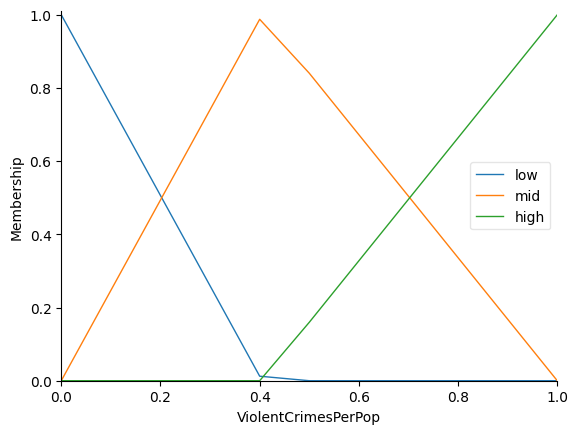

In [30]:
# low = y_train.iloc[:,0].min()
# high = y_train.iloc[:,0].max()
# mid = np.median(np.arange(low,high+0.1,0.1))

min_max_mid = get_cluster_MinMaxMid(y_train,[y_train.columns[0]],3)[0]

low = min_max_mid[0]['min']   ############ added [0]
high = min_max_mid[0]['max']
mid = min_max_mid[0]['mid']

consequent['low'] = fuzz.trimf(consequent.universe,[low,low,mid])
consequent['mid'] = fuzz.trimf(consequent.universe,[low,mid,high])
consequent['high'] = fuzz.trimf(consequent.universe,[mid,high,high])
consequent.view()

In [31]:
# Extract Unique Rules
def extract_rule_list(rule):
  # unique_rules = set()
  # for _, row in rules.iterrows():
  #     antecedents = tuple(row[:-3])  # Extract antecedents as a tuple
  #     consequent_name = row[-3]  # Extract consequent
  #     degree = row[-1]  # Extract degree
  #     unique_rules.add((antecedents, consequent_name, degree))

  # Generate Fuzzy Control Rules
  rules_list = []

  # Iterate over each row in the rules DataFrame
  for i in range(len(rules)):
      row = rules.iloc[i]
      antecedent_rules = []

      # Iterate over the antecedent columns (excluding the last two columns)
      for antecedent_name in antecedent.keys():
          membership = row[antecedent_name]
          antecedent_fuzzy_set = antecedent[antecedent_name]
          antecedent_membership = antecedent_fuzzy_set[membership]
          antecedent_rules.append(antecedent_membership)

      consequent_name = row['ViolentCrimesPerPop']
      consequent_fuzzy_set = consequent[consequent_name]

      #Create the fuzzy control rule and append it to rules_list
      rule = None
      for j in range(len(copy_list_of_features)):
        if rule == None:
          rule = antecedent_rules[j]
        else:
          rule &= antecedent_rules[j]

      rule = ctrl.Rule(rule,consequent_fuzzy_set, label=f"Rule {i}")
      rules_list.append(rule)

  return rules_list

In [32]:
rules_list = extract_rule_list(rules)
rules_list

[IF (((racepctblack[low] AND agePct16t24[mid]) AND medIncome[mid]) AND PctEmplProfServ[mid]) AND PctImmigRec5[low] THEN ViolentCrimesPerPop[mid]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (((racepctblack[low] AND agePct16t24[mid]) AND medIncome[low]) AND PctEmplProfServ[mid]) AND PctImmigRec5[mid] THEN ViolentCrimesPerPop[mid]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (((racepctblack[low] AND agePct16t24[low]) AND medIncome[mid]) AND PctEmplProfServ[mid]) AND PctImmigRec5[low] THEN ViolentCrimesPerPop[mid]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (((racepctblack[low] AND agePct16t24[high]) AND medIncome[low]) AND PctEmplProfServ[high]) AND PctImmigRec5[high] THEN ViolentCrimesPerPop[mid]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (((racepctblack[low] AND agePct16t24[mid]) AND medIncome[mid]) AND PctEmplProfServ[mid]) AND PctImmigRec5[mid] THEN ViolentCrimesPerPop[m

In [33]:
def predict_with_fuzzy_system(X, y, list_of_features, rules_list):

    consequent_ctrl = ctrl.ControlSystem(rules_list)
    pred = ctrl.ControlSystemSimulation(consequent_ctrl)

    actual_values = []
    predicted_values = []

    # Iterate over the training data
    for i in range(len(X)):
        input_data = X.iloc[i]

        # Set input values for each feature in the fuzzy system
        for feature in list_of_features:
            pred.input[feature] = input_data[feature]

        # Compute the output of the fuzzy system
        pred.compute()

        predicted_value = pred.output['ViolentCrimesPerPop']
        predicted_values.append(predicted_value)

        # Get the actual value of the target variable
        actual_value = y.iloc[i]['ViolentCrimesPerPop']
        actual_values.append(actual_value)

    # Print output
    print("\nOutput:")
    print("Predicted Violent Crimes Per Pop:", pred.output['ViolentCrimesPerPop'])

    # Show the output membership function
    consequent.view(sim=pred)

    return actual_values, predicted_values

Prediction using training set:

Output:
Predicted Violent Crimes Per Pop: 0.43965751225967453


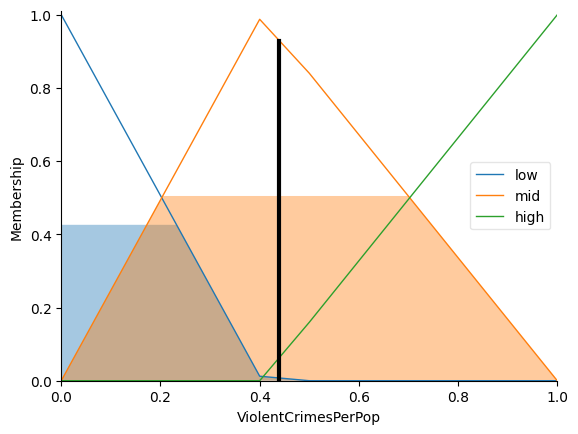

In [34]:
print("Prediction using training set:")
actual_values_train, predicted_values_train = predict_with_fuzzy_system(X_train, y_train, list_of_features, rules_list)

In [35]:
def calculate_performance(actual_values, predicted_values):

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(actual_values, predicted_values)
    print("Mean Squared Error:", mse)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(actual_values, predicted_values)
    print("Mean Absolute Error:", mae)

    return mse, mae

In [36]:
print("Performance calculated for training set:")
mse_train, mae_train = calculate_performance(actual_values_train, predicted_values_train)

Performance calculated for training set:
Mean Squared Error: 0.10034554874513349
Mean Absolute Error: 0.2911255914285901


# **Model Tunning**


In [37]:
import time

Settings  1  :  [50, 0.005, 5, False, True]
-------------------------------------------
Variance is :  6.698136590733861e-05
Average fitness is:  -0.03877401864682972

Result - 
Top feature in binary form :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
List of top features :  ['perCapInc', 'blackPerCap', 'RentLowQ', 'PctSameCity85', 'PctUsePubTrans']
Best score :  -0.0384141414964056

Output:
Predicted Violent Crimes Per Pop: 0.45581791022239476

Performance calculated for validation set : 
Mean Squared Error: 0.09202101373913049
Mean Absolute Error: 0.2777042710523058

Running time:  29.71 seconds



Settings  2  :  [50, 0.05, 5, False, True]
-------------------------------------------
Variance is :  7.874443917665174e-05
Average 

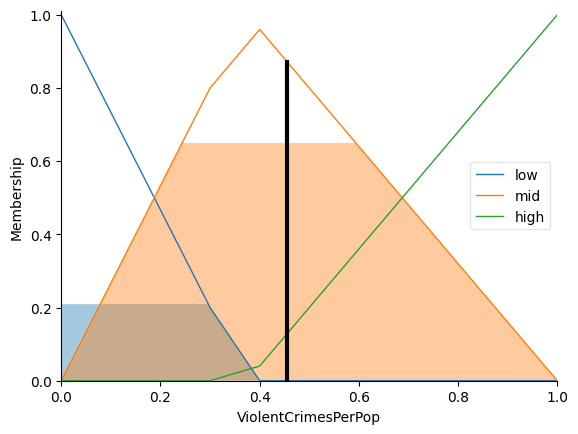

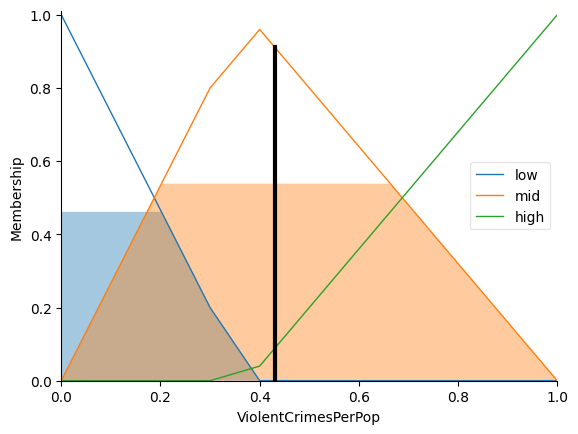

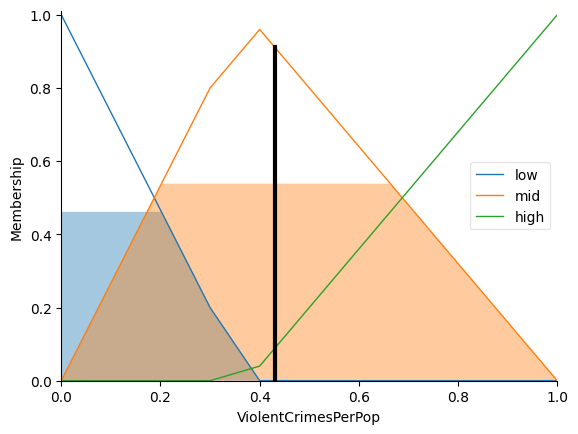

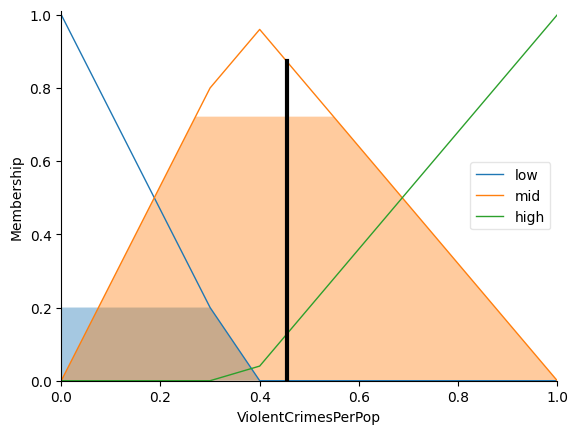

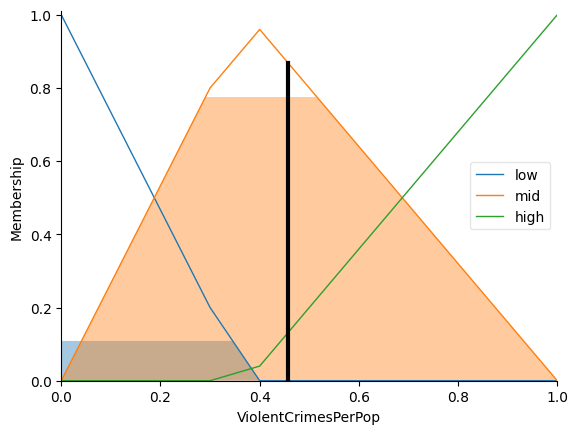

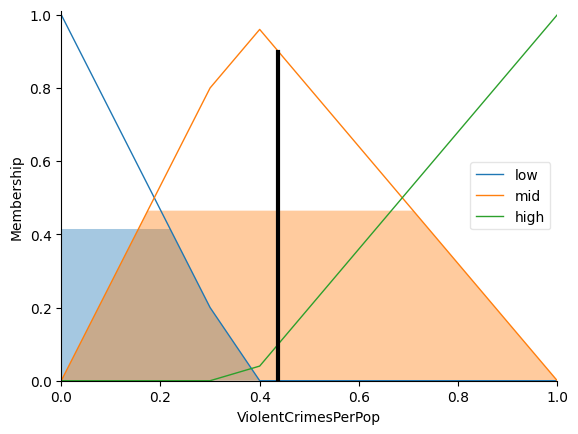

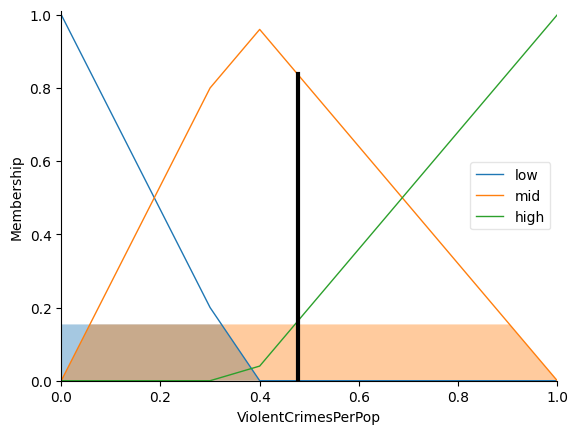

In [43]:
#[population_size,top_level,num_top_feature,genetic_algo,correlation]

def get_actual_prediction(X,y,copy_list_of_features,rules_list):

  consequent_ctrl = ctrl.ControlSystem(rules_list)
  pred = ctrl.ControlSystemSimulation(consequent_ctrl)

  actual_values = []
  predicted_values = []

  # Iterate over the training data
  for i in range(len(X)):
      input_data = X.iloc[i]

      # Set input values for each feature in the fuzzy system
      for feature in copy_list_of_features:
          pred.input[feature] = input_data[feature]

      # Compute the output of the fuzzy system
      pred.compute()

      predicted_value = pred.output['ViolentCrimesPerPop']
      predicted_values.append(predicted_value)

      # Get the actual value of the target variable
      actual_value = y.iloc[i]['ViolentCrimesPerPop']
      actual_values.append(actual_value)

  # Print output               ################ added by hy
  print("\nOutput:")
  print("Predicted Violent Crimes Per Pop:", pred.output['ViolentCrimesPerPop'])

  # Show the output membership function         ################# added by hy
  consequent.view(sim=pred)


  return actual_values,predicted_values


###################################################################################
def extract_rule_list_test(rules,antecedent,copy_list_of_features):
  rules_list = []

  # Iterate over each row in the rules DataFrame
  for i in range(len(rules)):
      row = rules.iloc[i]
      antecedent_rules = []

      # Iterate over the antecedent columns (excluding the last two columns)
      for antecedent_name in antecedent.keys():
          membership = row[antecedent_name]
          antecedent_fuzzy_set = antecedent[antecedent_name]
          antecedent_membership = antecedent_fuzzy_set[membership]
          antecedent_rules.append(antecedent_membership)

      consequent_name = row['ViolentCrimesPerPop']
      consequent_fuzzy_set = consequent[consequent_name]

      #Create the fuzzy control rule and append it to rules_list
      rule = None
      for j in range(len(copy_list_of_features)):
        if rule == None:
          rule = antecedent_rules[j]
        else:
          rule &= antecedent_rules[j]

      rule = ctrl.Rule(rule,consequent_fuzzy_set, label=f"Rule {i}")
      rules_list.append(rule)
  return rules_list

##################################################################################
def model_tunning(X,y,settings):
  df = pd.concat([X,y],axis = 1)
  if settings[3] == True:
    filter_low_correlation_features_with_target(df,0.3,y.columns)
    filter_high_correlation_features_with_target(df,y.columns,0.85)

  if settings[4] == True:
    top_features, best_score = genetic_algo(df,X, y,settings[0],settings[1],settings[2])

    # # Print the selected top features and best score for debugging
    # print("Top Features:", top_features)
    # print("Best Score:", best_score)

  #printing top features selected through genetic algorithm
  i = 0
  list_of_features= []
  for i in range(len(top_features)):
    if(top_features[i]==1):
      list_of_features.append(df[df.columns].columns[i])

  print("\nResult - ")
  print("Top feature in binary form : ", top_features)
  print("List of top features : ",list_of_features)
  print("Best score : ", best_score)

  #list_of_features = ['PctSpeakEnglOnly', 'PersPerRentOccHous', 'PctHousLess3BR', 'NumInShelters']

  #Define rules
  feature_object = []
  copy_list_of_features = list_of_features

  feature_min_max_mid = []
  target_min_max_mid = []

  feature_min_max_mid = get_cluster_MinMaxMid(X,copy_list_of_features,3,fuzzfied = True)[1]
  target_min_max_mid = get_cluster_MinMaxMid(y,['ViolentCrimesPerPop'],3,fuzzfied = True)[1]
  feature_object = feature_min_max_mid + target_min_max_mid

  train_data = X[copy_list_of_features]
  train_data = train_data.join(y)

  #Define rule,antecedent and consequent
  antecedent = {}
  for feature in copy_list_of_features:
    antecedent[feature] = ctrl.Antecedent(np.arange(0,1+0.1,0.1),feature)

  column_name = y.columns[0]

  consequent = ctrl.Consequent(np.arange(0,1+0.1,0.1), column_name)

  for feature in antecedent.keys():
    min_max_mid = get_cluster_MinMaxMid(X,[feature],3)[0]

    low = min_max_mid[0]['min']            ############### added [0]
    high = min_max_mid[0]['max']
    mid = min_max_mid[0]['mid']

    antecedent[feature]['low'] = fuzz.trimf(antecedent[feature].universe,[low,low,mid])
    antecedent[feature]['mid'] = fuzz.trimf(antecedent[feature].universe,[low,mid,high])
    antecedent[feature]['high'] = fuzz.trimf(antecedent[feature].universe,[mid,high,high])

  min_max_mid = {'min': 0, 'max': 0, 'mid': 0}

  min_max_mid = get_cluster_MinMaxMid(y,[y.columns[0]],3)[0]

  low = min_max_mid[0]['min']           ############### added [0]
  high = min_max_mid[0]['max']
  mid = min_max_mid[0]['mid']

  consequent['low'] = fuzz.trimf(consequent.universe,[low,low,mid])
  consequent['mid'] = fuzz.trimf(consequent.universe,[low,mid,high])
  consequent['high'] = fuzz.trimf(consequent.universe,[mid,high,high])

  rules = get_rule(train_data, X, y, feature_object) ######## add 2 more parameter
  rules.sort_values(by = 'degree',ascending=False,inplace = True)
  rules_list = extract_rule_list_test(rules,antecedent,copy_list_of_features)

  #Prediction on validation set
  actual_values, predicted_values = get_actual_prediction(X, y, copy_list_of_features, rules_list)

  print("\nPerformance calculated for validation set : ")
  mse, mae = calculate_performance(actual_values, predicted_values)
  return antecedent, consequent, rules_list, mse

#################################################################################

settings = [
            [50,0.005,5,False,True],
            [50,0.05,5,False,True],
            [50,0.005,10,False,True],

            [100,0.05,5,True,True],
            [50,0.005,5,True,True],
            [50,0.005,10,True,True],
            [50,0.05,15,True,True]]

mse = []

for i in range(len(settings)):
  start_time = time.time()

  print("Settings ",i+1," : ",settings[i])
  print("-------------------------------------------")
  _, _, _, tempt = model_tunning(X_val,y_val,settings[i])
  mse.append(tempt)

  end_time = time.time()
  diff_time = end_time - start_time
  print("\nRunning time: ", round(diff_time,2), "seconds")

  print("\n\n")

best_setting_index = np.argmin(mse)
best_setting = settings[best_setting_index]
print("Best settings : ", best_setting)
print("MSE : ", mse[best_setting_index])

# **Model Testing**

Testing with the best setting
Features with low correlation with target that has been dropped :  []
Feature with high correlation with target that has been dropped :  {'PctLargHouseOccup', 'agePct65up', 'PctEmploy', 'PctRecImmig5', 'PctOccupMgmtProf', 'PctImmigRec8', 'PctLess9thGrade', 'RentMedian', 'MalePctDivorce', 'PctYoungKids2Par', 'PctTeen2Par', 'numbUrban', 'PctForeignBorn', 'racePctHisp', 'PctRecentImmig', 'PctHousOwnOcc', 'OwnOccHiQuart', 'NumInShelters', 'OwnOccMedVal', 'PctFam2Par', 'householdsize', 'PctImmigRec5', 'PersPerFam', 'PctNotSpeakEnglWell', 'TotalPctDiv', 'RentHighQ', 'PctRecImmig10', 'MedRent', 'perCapInc', 'medIncome', 'NumUnderPov', 'PctLargHouseFam', 'PctImmigRecent', 'population', 'agePct12t21', 'agePct16t24', 'OwnOccLowQuart', 'whitePerCap', 'PctWorkMomYoungKids', 'PctRecImmig8', 'HousVacant', 'PersPerOccupHous', 'PctBSorMore'}
Variance is :  2.1926301913880354e-05
Average fitness is:  -0.030708140000284986

Result - 
Top feature in binary form :  [1, 1, 0, 

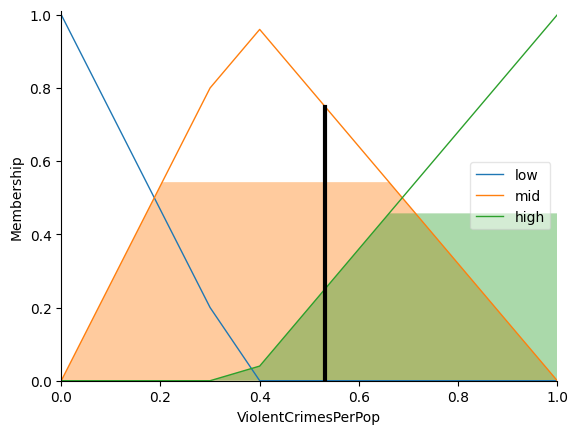

In [47]:
# Use the best setting for testing and display output defuzzification
print("Testing with the best setting")
antecedent, consequent, rules_list, mse = model_tunning(X_test, y_test, best_setting)

Membership Functions:


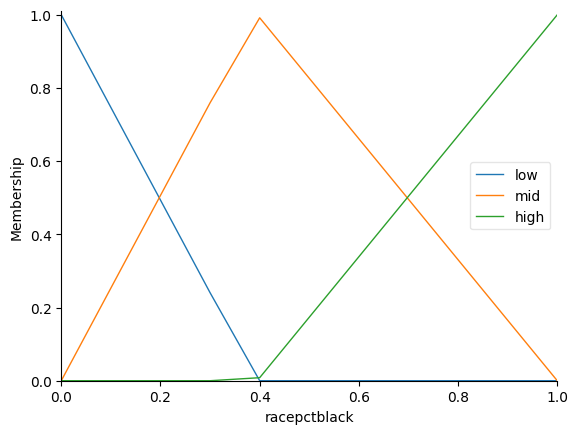

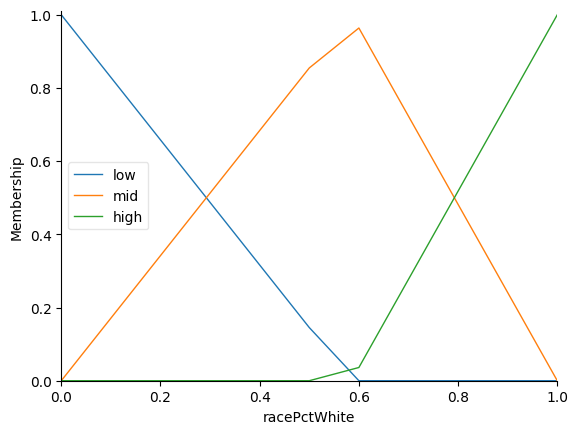

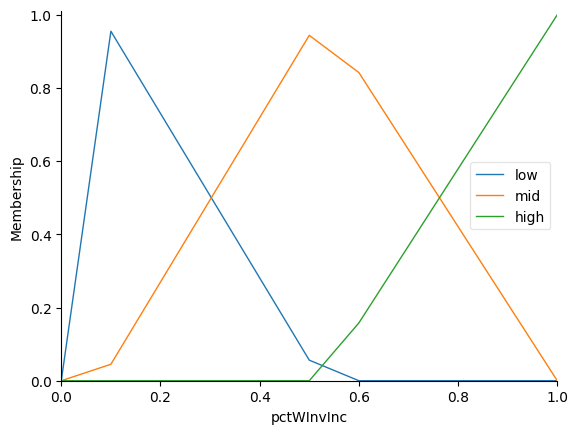

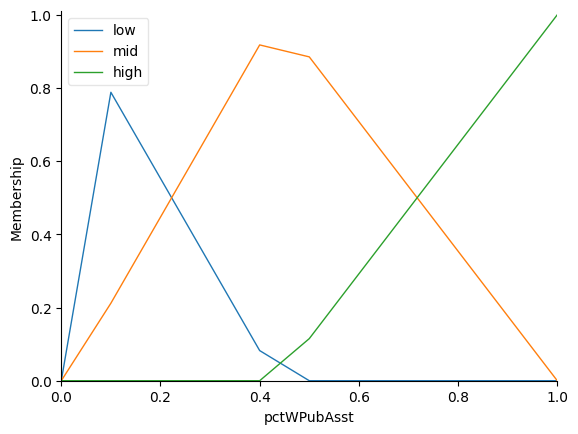

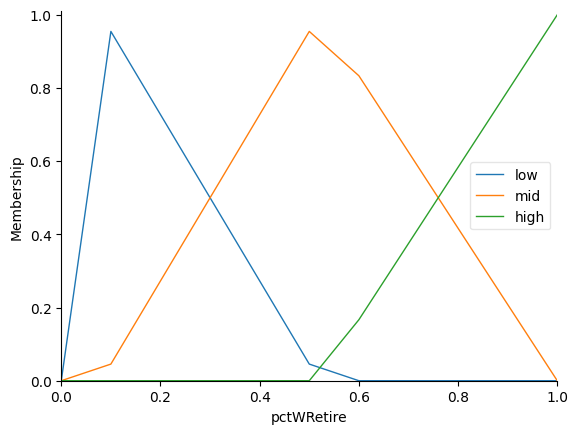

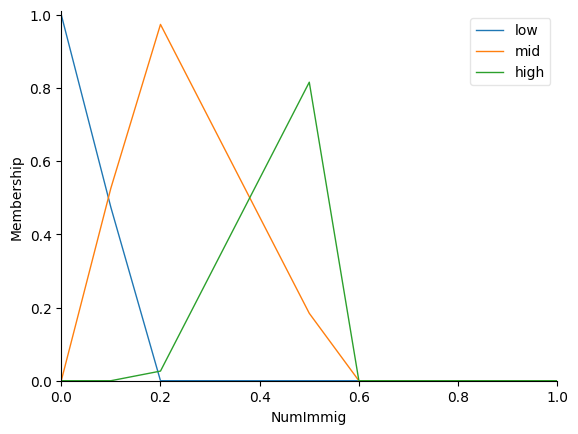

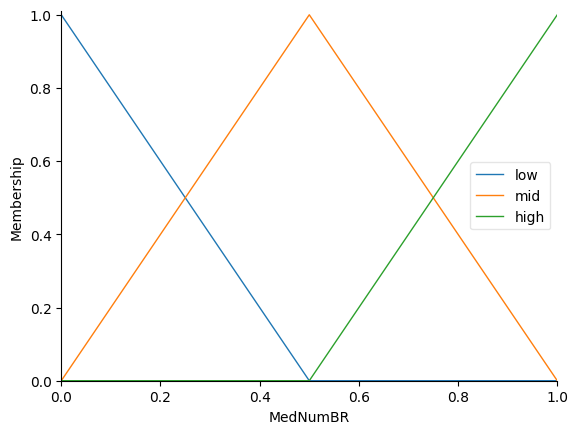

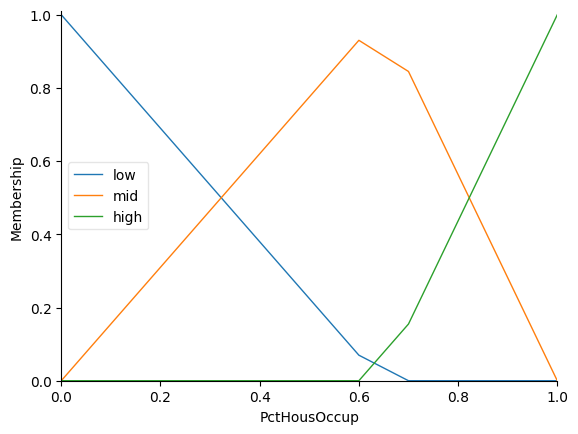

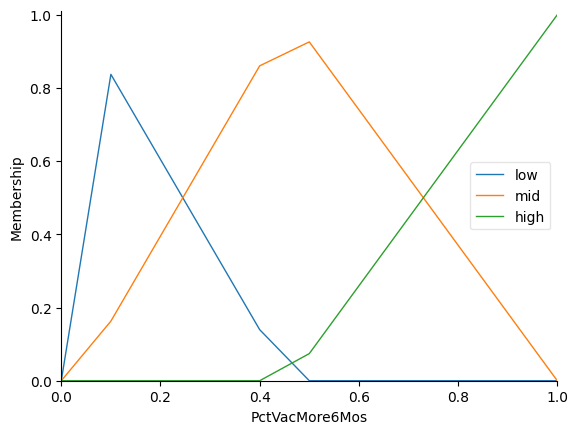

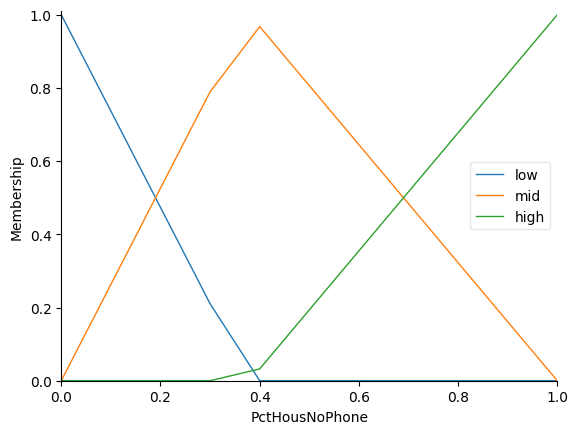

In [48]:
# Display the membership functions
print("Membership Functions:")
for feature in antecedent.keys():
    antecedent[feature].view()

In [49]:
# Display the rules list
print("Rules List:")
for rule in rules_list:
    print(rule)

Rules List:
IF ((((((((racepctblack[mid] AND racePctWhite[mid]) AND pctWInvInc[mid]) AND pctWPubAsst[mid]) AND pctWRetire[mid]) AND NumImmig[low]) AND MedNumBR[mid]) AND PctHousOccup[mid]) AND PctVacMore6Mos[mid]) AND PctHousNoPhone[mid] THEN ViolentCrimesPerPop[mid]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF ((((((((racepctblack[low] AND racePctWhite[high]) AND pctWInvInc[mid]) AND pctWPubAsst[mid]) AND pctWRetire[mid]) AND NumImmig[low]) AND MedNumBR[mid]) AND PctHousOccup[mid]) AND PctVacMore6Mos[mid]) AND PctHousNoPhone[mid] THEN ViolentCrimesPerPop[mid]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF ((((((((racepctblack[low] AND racePctWhite[high]) AND pctWInvInc[mid]) AND pctWPubAsst[mid]) AND pctWRetire[mid]) AND NumImmig[low]) AND MedNumBR[low]) AND PctHousOccup[mid]) AND PctVacMore6Mos[mid]) AND PctHousNoPhone[mid] THEN ViolentCrimesPerPop[mid]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF ((((((((racepctbl